# Exercise 8: Sound transformations

In this exercise you will use the HPS model to creatively transform sounds. There are two parts in this exercise. In the first one you should perform a natural sounding transformation on the speech sound that you used in the previous exercise (E7). In the second part you should select a sound of your choice and do a "creative" transformation. You will have to write a short description of the sound and of the transformation you did, giving the link to the original sound and uploading several transformed sounds.

For this exercise, you can use the `transformations_GUI.py` (in `software/transformations_interface/`) to try things, once decided you can fill up the code in this file. You can also do everything from here and add any new code you wish.

In order to perform a good/interesting transformation you should make sure that you have performed an analysis that is adequate for the type of transformation you want to do. Not every HPS analysis representation will work for every type of sound transformation. There will be things in the analysis that when modified will result in undesired artifacts. In general, for any transformation, it is best to have the harmonic values as smooth and continuous as possible and an stochastic representation as smooth and with as few values as possible. It might be much better to start with an analysis representation that does not result in the best reconstruction in exchange of having smoother and more compact data.

To help you with the exercise, we give a brief description of the transformation parameters used by the HPS transformation function:

1. `freqScaling`: frequency scaling factors to be applied to the harmonics of the sound, in time-value pairs (where value of 1 is no scaling). The time values can be normalized, from 0 to 1, or can correspond to the times in seconds of the input sound. The scaling factor is a multiplicative factor, thus a value of 1 is no change. Example: to transpose an octave the sound you can specify `[0, 2, 1, 2]`.
2. `freqStretching`: frequency stretching factors to be applied to the harmonics of the sound, in time-value pairs (value of 1 is no stretching). The time values can be normalized, from 0 to 1, or can correspond to the times in seconds of the input sound. The stretching factor is a multiplicative factor whose effect depend on the harmonic number, higher harmonics being more affected that lower ones, thus resulting in an inharmonic effect. A value of 1 results in no transformation. Example: an array like `[0, 1.2, 1, 1.2]` will result in a perceptually large inharmonic effect.
3. `timbrePreservation`: 1 preserves the original timbre, 0 does not. It can only have a value of 0 or of 1. By setting the value to 1 the spectral shape of the original sound is preserved even when the frequencies of the sound are modified. In the case of speech it would correspond to the idea of preserving the identity of the speaker after the transformation.
4. `timeScaling`: time scaling factors to be applied to the whole sound, in time-value pairs (value of 1 is no scaling). The time values can be normalized, from 0 to 1, or can correspond to the times in seconds of the input sound. The time scaling factor is a multiplicative factor, thus 1 is no change. Example: to stretch the original sound to twice the original duration, we can specify `[0, 0, 1, 2]`.

All the transformation values can have as many points as desired, but they have to be in the form of an array with time-value pairs, so of even size. For example a good array for a frequency stretching of a sound that has a duration of 3.146 seconds could be: `[0, 1.2, 2.01, 1.2, 2.679, 0.7, 3.146, 0.7]`.

## Part 1. Perform natural sounding transformations of a speech sound

Use the HPS model with the sound `speech-female.wav`, available in the sounds directory, to first analyze and then obtain a natural sounding transformation of the sound. The synthesized sound should sound as different as possible to the original sound while sounding natural. By natural we mean that it should sound like speech, that it could have been possible to be produced by a human, and by listening we should consider it as a speech sound, even though we might not be able to understand it. You should first make sure that you start from a good analysis, then you can do time and/or frequency scaling transformations. The transformation should be done with a single pass, no mixing of sounds coming from different transformations. Since you used the same sound in A7, use that experience to get a good analysis, but consider that the analysis, given that we now want to use it for applying a very strong transformation, might be done differently than what you did in A7.

Write a short paragraph for every transformation, explaining what you wanted to obtain and explaining the transformations you did, giving both the analysis and transformation parameter values (sufficiently detailed for the evaluator to be able to reproduce the analysis and transformation).

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window
import sys, os
sys.path.append('../software/models/')
sys.path.append('../software/transformations/')
import utilFunctions as UF
import stft as STFT
import hpsModel as HPS
import hpsTransformations as HPST
import harmonicTransformations as HT
import IPython.display as ipd

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

In [161]:
# 1.1 perform an analysis/synthesis using the HPS model

input_file = '../sounds/speech-female.wav'

### set the parameters
window ='blackmanharris'
M = 1601
N = 2048
t = -100
minSineDur = 0.05
nH = 60
minf0 = 100
maxf0 = 350
f0et = 10.0
harmDevSlope = 0.1
stocf = 0.1

# no need to modify anything after this
Ns = 512
H = 128

(fs, x) = UF.wavread(input_file)
w = get_window(window, M, fftbins=True)
hfreq, hmag, hphase, stocEnv = HPS.hpsModelAnal(x, fs, w, N, H, t, nH, minf0, maxf0, f0et, harmDevSlope, minSineDur, Ns, stocf)
y, yh, yst = HPS.hpsModelSynth(hfreq, hmag, hphase, stocEnv, Ns, H, fs)

ipd.display(ipd.Audio(data=x, rate=fs))
ipd.display(ipd.Audio(data=y, rate=fs))

In [162]:
# 1.2 Perform a transformation from the previous analysis

### define the transformations
freqScaling = np.array([0, 0.78, 1, 0.78])
freqStretching = np.array([0, 1, 1, 1])
timbrePreservation = 0
timeScaling = np.array([0, 0, 1, 1.1])

# no ned to modify the following code 
Ns = 512
H = 128

# frequency scaling of the harmonics 
hfreqt, hmagt = HT.harmonicFreqScaling(hfreq, hmag, freqScaling, freqStretching, timbrePreservation, fs)

# time scaling the sound
yhfreq, yhmag, ystocEnv = HPST.hpsTimeScale(hfreqt, hmagt, stocEnv, timeScaling)

# synthesis from the trasformed hps representation 
y, yh, yst = HPS.hpsModelSynth(yhfreq, yhmag, np.array([]), ystocEnv, Ns, H, fs)

ipd.display(ipd.Audio(data=y, rate=fs))

### Explain Part 1

Here we attempt to do a basic female to male voice conversion. To achieve this we need to perserve the original harmonics of the voice but use frequency scaling to lower the fundamental. We notice after looking at the STFT that the female voice in this same has a fundamental between 200 Hz and 300 Hz. We examine the other speech file of a male and see that the fundamental is between 100 Hz and 200 Hz. So to perform the transformation we scale all of the harmonics downward by a factor between 0.5 - 1.0. To determine this factor we experiment with some different values listening to the output. Clearly 0.5 is far too low and makes the voice sound very demonic. After some experimentation we find that 0.78 produces a good result. We do not do any frequency stretching since we want to perserve the harmonicty and we do not apply timbre preservation because we do not want to apply the formants of the female speech. To make the transformation a little more interesting we try to slow down the speech slightly using time scaling. 

The biggest challenge in this transformation is that of the stoachstic portion. Since it cannot be captured perfectly, we get the final effect that sounds almost like male speech plus a female voice faintly whispering the same phrase. By greatly lowering the stoachstic decimation factor we can actually reduce this effect somewhat at the cost of a lower fidelity outcome. That is, the noise is less well represented but its characteristics are less clear, making the voice sound more like a single source. 

## Part 2. Perform creative transformations with a sound of your choice

Pick any natural and harmonic sound from Freesound and use the HPS model to do the most creative and interesting transformation you can come up with. Sounding as different as possible from the original sound.

It is essential that you start with a natural harmonic sound. Examples include (but not limited to) any acoustic harmonic instrument, speech, harmonic sound from nature, etc. As long as they have a harmonic structure, you can use it. You can even reuse the sound you used in A7-Part2 or upload your own sound to freesound and then use it.

The sound from Freesound to use could be in any format, but to use the sms-tools software you will have to first convert it to be a monophonic file (one channel), sampling rate of 44100, and 16bits samples.

You can do any interesting transformation with a single pass. It is not allowed to mix sounds obtained from different transformations. The transformed sound need not sound natural. So, time to show some creativity!

Write a short paragraph for every transformation, explaining what you wanted to obtain and explaining the transformations you did, giving both the analysis and transformation parameter values (sufficiently detailed for the evaluator to be able to reproduce the analysis and transformation).

In [279]:
# 1.1 perform an analysis/synthesis using the HPS model

### set the parameters
input_file = '../sounds/39914__digifishmusic__katy-sings-laaoooaaa.wav'
window ='blackmanharris'
M = 1201
N = 2048
t = -100
minSineDur = 0.001
nH = 32
minf0 = 200
maxf0 = 1000
f0et = 10.0
harmDevSlope = 0.001
stocf = 0.4

# no need to modify anything after this
Ns = 512
H = 128

(fs, x) = UF.wavread(input_file)
w = get_window(window, M, fftbins=True)
hfreq, hmag, hphase, stocEnv = HPS.hpsModelAnal(x, fs, w, N, H, t, nH, minf0, maxf0, f0et, harmDevSlope, minSineDur, Ns, stocf)
y, yh, yst = HPS.hpsModelSynth(hfreq, hmag, hphase, stocEnv, Ns, H, fs)

ipd.display(ipd.Audio(data=x, rate=fs))
ipd.display(ipd.Audio(data=y, rate=fs))

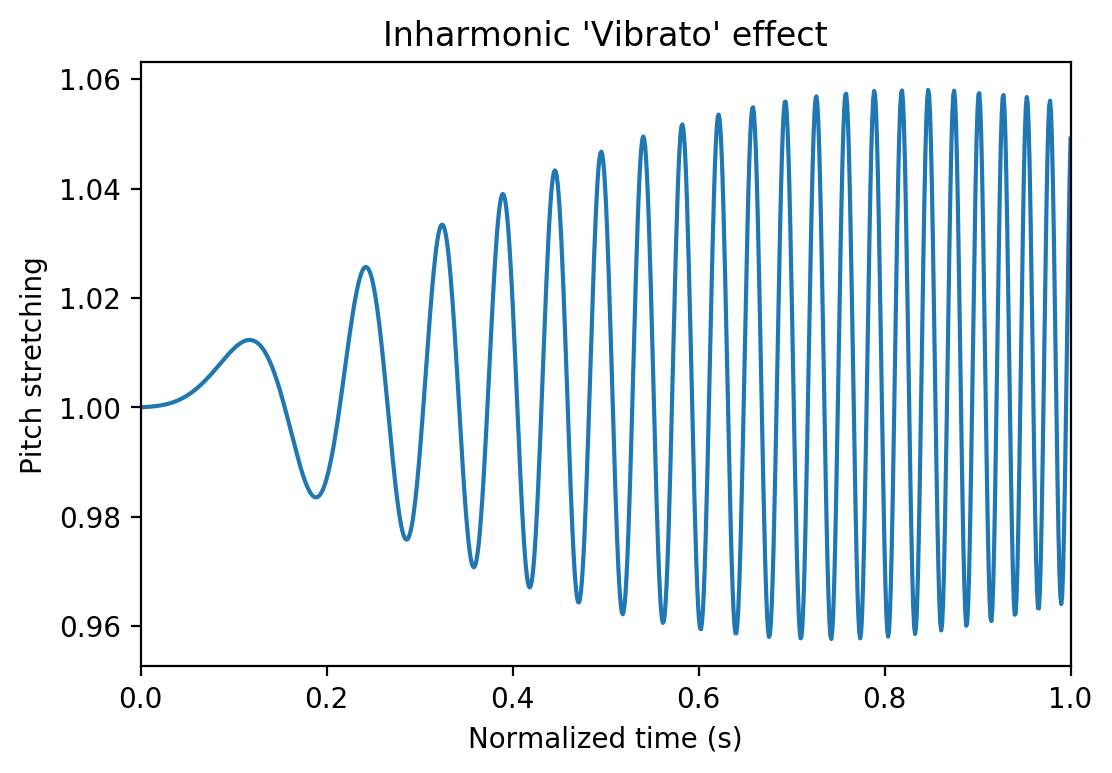

In [350]:
# 1.2 Perform a transformation from the previous analysis

### define the transformations
freqScaling = np.array([0, 1, 1, 1])
freqStretching = np.array([0, 1, 1, 1])
timbrePreservation = 1
timeScaling = np.array([0.0, 0.0, 1.0, 2.0])

t = np.linspace(0.0, 1.0, 1000)
depth = 0.05 * np.sin(t * 2)
frequency = 450 * np.sin(t * 0.3)
ramp_shift = np.linspace(0.0, 0.01, 1000)
stretch = (depth * np.sin(t * frequency)) + 1.0 + ramp_shift

c = np.empty((t.size + stretch.size,), dtype=t.dtype)
c[0::2] = t
c[1::2] = stretch

freqStretching = c

plt.title("Inharmonic 'Vibrato' effect")
plt.plot(t, stretch)
plt.ylabel("Pitch stretching")
plt.xlabel("Normalized time (s)")
plt.xlim([0.0,1])
plt.show()

# no need to modify anything after this
Ns = 512
H = 128

# frequency scaling of the harmonics 
hfreqt, hmagt = HT.harmonicFreqScaling(hfreq, hmag, freqScaling, freqStretching, timbrePreservation, fs)

# time scaling the sound
yhfreq, yhmag, ystocEnv = HPST.hpsTimeScale(hfreqt, hmagt, stocEnv, timeScaling)

# synthesis from the trasformed hps representation 
y, yh, yst = HPS.hpsModelSynth(yhfreq, yhmag, np.array([]), ystocEnv, Ns, H, fs)

ipd.display(ipd.Audio(data=y, rate=fs))

### Explain Part 2
In this part we try to do something quite strange with a female vocal. First we slow it down by a factor of 2 to make it slower overall and provide more time for our effect to develop. Next we play with frequency stretching to introduce inharmonicty. To make this more interesting than just writing in an array of points ourself by hand we try to do this programatically using a kind of simple LFO. We use two sine waves where one modulates the other the make this inharmonic vibrato effect where the strecthing changes over time and the frequnecy that this stretching occurs begins to increase over the period of the signal. Also we apply a linear ramp to this value so the overall stretch value increases over the duration, as does the 'depth' of this where the effect becomes much stronger at the end. 